In [72]:
import tensorflow as tf
import numpy as np
import math
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version ", tf.VERSION)
print("Numpy version ", np.__version__)

Tensorflow version  1.14.0
Numpy version  1.18.1


Generating Ranges Of Data

In [86]:
x = np.linspace(-5,5,500)

Sigmoid Activation Function and Bipolar Sigmoid Activation Function

In [87]:
y_step  = tf.constant(np.heaviside(x, 0)) # step function

y_sigmoid = tf.sigmoid(x)

y_bipolar_sig = (1 - tf.exp(-x)) / (1 + tf.exp(-x))

y_softmax = tf.nn.softmax(x)

y_tanh = tf.nn.tanh(x)

y_atan = tf.atan(x) # arctan

y_leCun_tanh = (1.7159 * tf.nn.tanh((2/3) * x)) # LeCun's Tanh

y_relu = tf.nn.relu(x)

y_leaky_relu = tf.nn.leaky_relu(x)

y_softplus = tf.nn.softplus(x)

y_mish = x * tf.math.tanh(tf.math.softplus(x))

y_swish = tf.nn.swish(x)

In [88]:
sess = tf.Session()
y_step, y_sigmoid, y_bipolar_sig, y_softmax, y_tanh, y_atan, y_leCun_tanh, y_relu, y_leaky_relu, y_softplus,y_mish,y_swish = sess.run([y_step,y_swish,y_sigmoid, y_bipolar_sig, y_softmax, y_tanh, y_atan, y_leCun_tanh, y_relu, y_leaky_relu, y_softplus,y_mish])

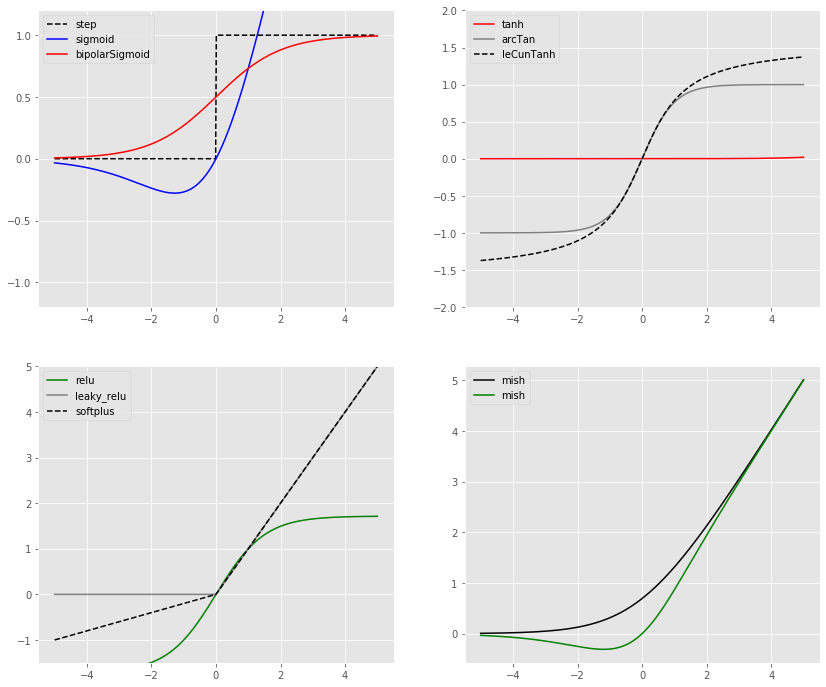

In [89]:
plt.figure(1, figsize=(14, 12))

plt.subplot(221)
plt.plot(x, y_step, c='k', linestyle='--', label='step')
plt.plot(x, y_sigmoid, c='blue', label='sigmoid')
plt.plot(x, y_bipolar_sig, c='red', label= 'bipolarSigmoid')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_tanh, c= 'red', label= 'tanh')
plt.plot(x, y_atan, c= 'grey', label= 'arcTan')
plt.plot(x, y_leCun_tanh, c= 'black', label= 'leCunTanh', linestyle= '--')
plt.ylim((-2.0, 2.0))
plt.legend(loc= 'best')

plt.subplot(223)
plt.plot(x, y_relu, c='green', label='relu')
plt.plot(x, y_leaky_relu, c='grey', label='leaky_relu')
plt.plot(x, y_softplus, c='black', label='softplus', linestyle= '--')
plt.ylim((-1.5, 5))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_mish, c='black', label='mish')
plt.plot(x, y_swish, c='green', label='mish')
plt.legend(loc='best')



plt.show()

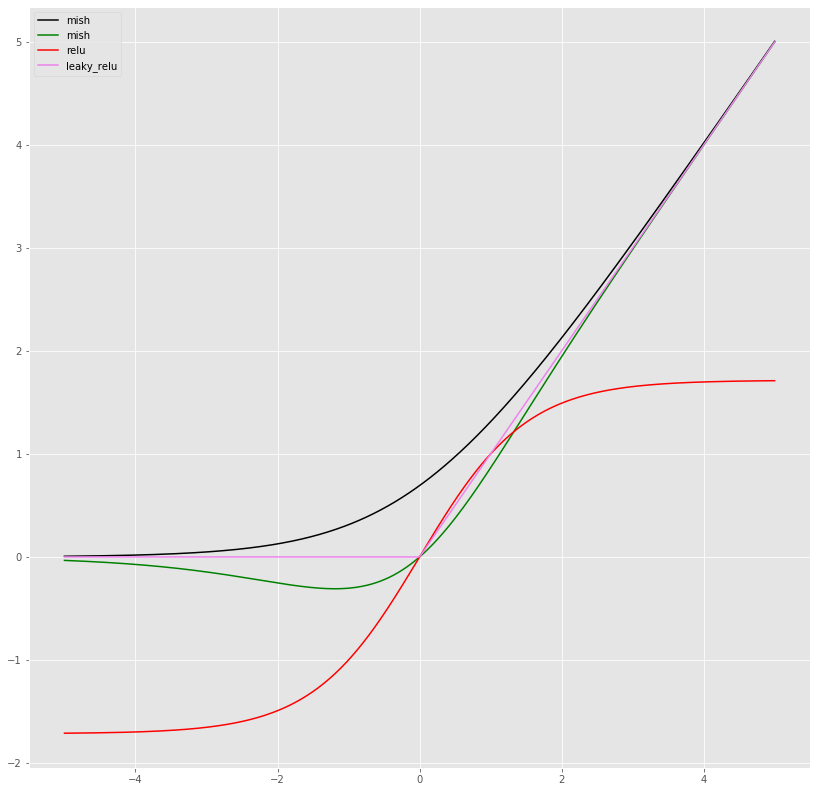

In [99]:
plt.figure(1, figsize=(14,14))
plt.plot(x, y_mish, c='black', label='mish')
plt.plot(x, y_swish, c='green', label='mish')
plt.plot(x, y_relu, c='red', label='relu')
plt.plot(x, y_leaky_relu, c='violet', label='leaky_relu')
plt.legend(loc='best')
plt.show()

# Derivatives of Swish Activation Function

In [104]:
def plot_graph(func, derivative):
    """Function for plotting activation and its derivative"""
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Activation function')
    plt.plot(func)
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Derivative')
    plt.plot(derivative)
    plt.show()

# Sigmoid Activation Function

In [105]:
def sigmoid(scores):
    """sigmoid function"""
    return (1/(1 + np.exp(-scores)))

def sigmoid_grad(scores):
    """sigmoid function derivative"""
    return sigmoid(scores)*(1-sigmoid(scores))

In [108]:
def relu(scores):
    """Return 0 if scores < 0 otherwise keep scores as it is."""
    scores[scores<=0]=0
    return scores

def relu_grad(scores):
    """Return 1 if scores > 0 otherwise return 0"""
    scores = np.where(scores>0, 1 , 0)
    return scores

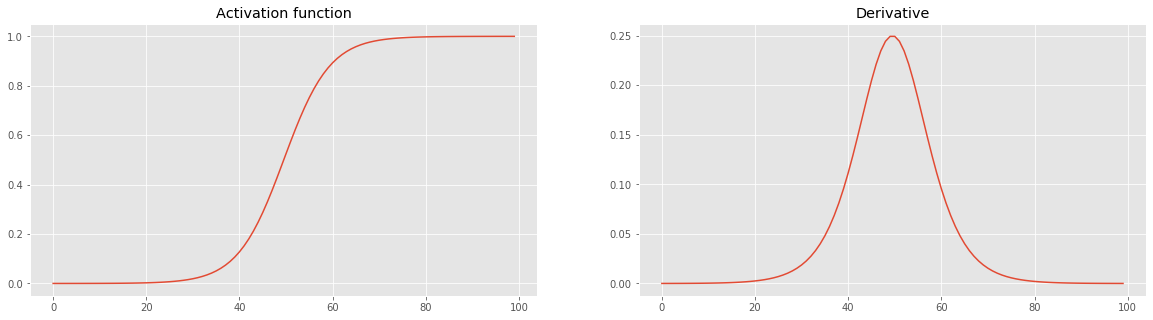

In [106]:
"""Plot sigmoid and its derivative"""
scores = np.linspace(-10,10,100)
plot_graph(sigmoid(scores), sigmoid_grad(scores))

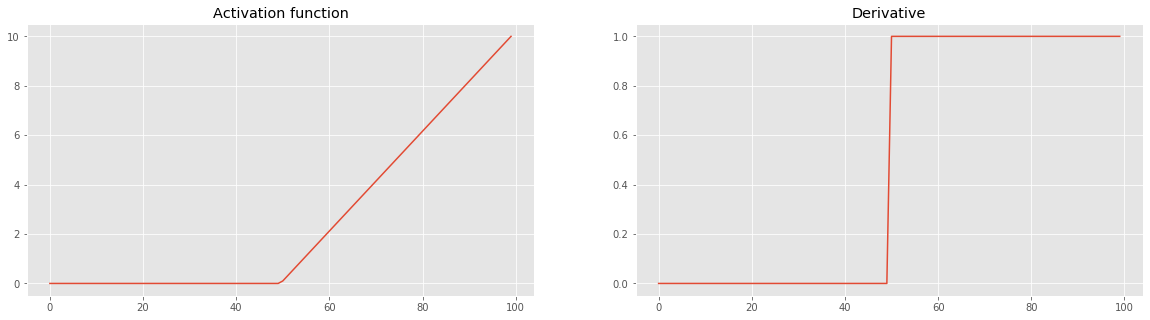

In [109]:
"""Plot ReLU function and its derivative"""
scores = np.linspace(-10,10,100)
plot_graph(relu(scores), relu_grad(scores))

In [120]:
from IPython.display import Image
swish_derivatives = Image('Derivatives.png')

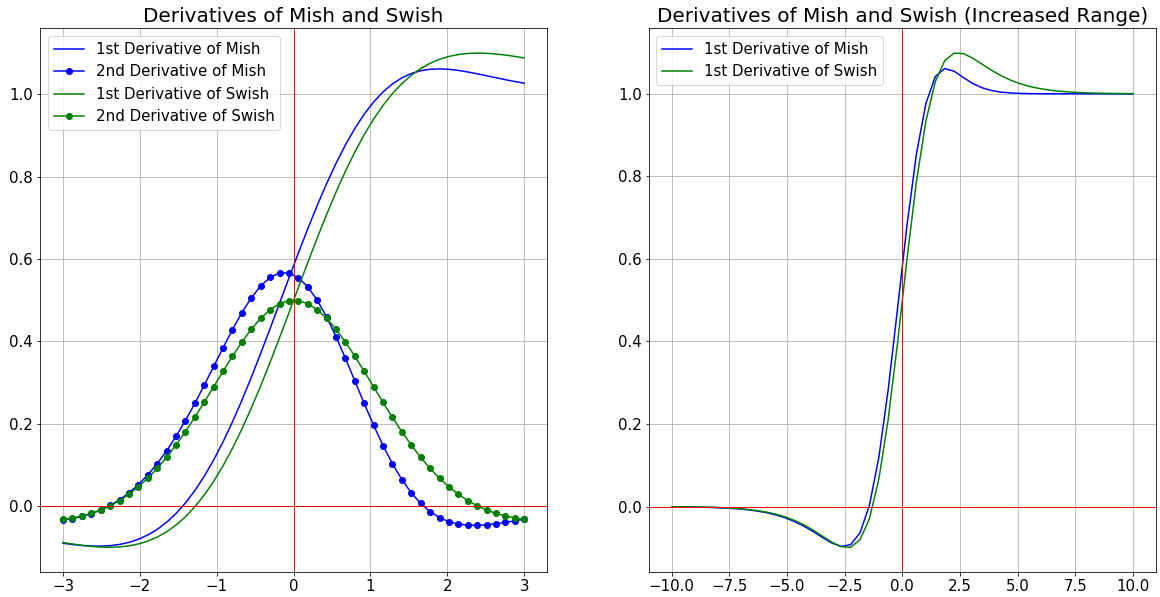

In [121]:
display(swish_derivatives)